# Uploading a dataset


```
# This is formatted as code
```



In [1]:
import pandas as pd

df = pd.read_csv("/content/test 2.csv")
df.head()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029.0,Excellent,High,Average,1.0,...,1.0,Mid,Large,22.0,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563.0,Good,High,Average,1.0,...,4.0,Entry,Medium,27.0,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583.0,Fair,High,Average,3.0,...,2.0,Senior,Medium,76.0,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525.0,Fair,Very High,High,0.0,...,4.0,Entry,Medium,96.0,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604.0,Good,High,Average,0.0,...,6.0,Mid,Large,45.0,Yes,No,No,Good,High,Stayed


## Basic Data Understanding


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               8116 non-null   int64  
 1   Age                       8116 non-null   int64  
 2   Gender                    8116 non-null   object 
 3   Years at Company          8116 non-null   int64  
 4   Job Role                  8115 non-null   object 
 5   Monthly Income            8115 non-null   float64
 6   Work-Life Balance         8115 non-null   object 
 7   Job Satisfaction          8115 non-null   object 
 8   Performance Rating        8115 non-null   object 
 9   Number of Promotions      8115 non-null   float64
 10  Overtime                  8115 non-null   object 
 11  Distance from Home        8115 non-null   float64
 12  Education Level           8115 non-null   object 
 13  Marital Status            8115 non-null   object 
 14  Number o

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,1
Monthly Income,1
Work-Life Balance,1
Job Satisfaction,1
Performance Rating,1
Number of Promotions,1


## Data Cleaning

In [3]:
# Numerical → median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3133375230.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Encoding Categorical Features

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## Feature–Target Split

In [5]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]


## Train–Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
print("Total samples:", X.shape[0])
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

print("\nTraining target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Total samples: 8116
Training samples: 6492
Testing samples: 1624

Training target shape: (6492,)
Testing target shape: (1624,)


In [8]:
print("Train attrition ratio:")
print(y_train.value_counts(normalize=True))

print("\nTest attrition ratio:")
print(y_test.value_counts(normalize=True))


Train attrition ratio:
Attrition
1    0.530345
0    0.469655
Name: proportion, dtype: float64

Test attrition ratio:
Attrition
1    0.530172
0    0.469828
Name: proportion, dtype: float64


## Feature Selection (Using Random Forest Importance)

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fs.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_fs.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
15,Job Level,0.092406
13,Marital Status,0.090870
11,Distance from Home,0.078445
0,Employee ID,0.075028
5,Monthly Income,0.074338
17,Company Tenure,0.069639
1,Age,0.066317
3,Years at Company,0.064857
18,Remote Work,0.040606
12,Education Level,0.039215


Select Important Features (Above Mean Importance)

In [10]:
threshold = feature_importance["Importance"].mean()

selected_features = feature_importance[
    feature_importance["Importance"] > threshold
]["Feature"].tolist()

print("Important Features Used for Training:\n")
for f in selected_features:
    print(f)

print("\nTotal original features:", X_train.shape[1])
print("Selected important features:", len(selected_features))


Important Features Used for Training:

Job Level
Marital Status
Distance from Home
Employee ID
Monthly Income
Company Tenure
Age
Years at Company

Total original features: 23
Selected important features: 8


Reduce Dataset to Important Features

In [11]:
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]


# Train Models Using Selected Features

**Decision Tree**

Decision Tree Accuracy: 0.5782019704433498

Confusion Matrix:
 [[435 328]
 [357 504]]


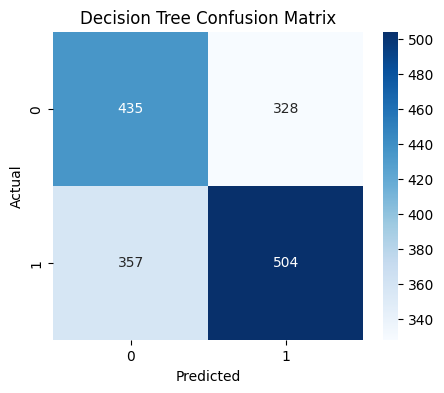


Precision: 0.6057692307692307
Recall: 0.5853658536585366
F1 Score: 0.5953927938570585

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       763
           1       0.61      0.59      0.60       861

    accuracy                           0.58      1624
   macro avg       0.58      0.58      0.58      1624
weighted avg       0.58      0.58      0.58      1624

ROC-AUC Score: 0.5777419045487965


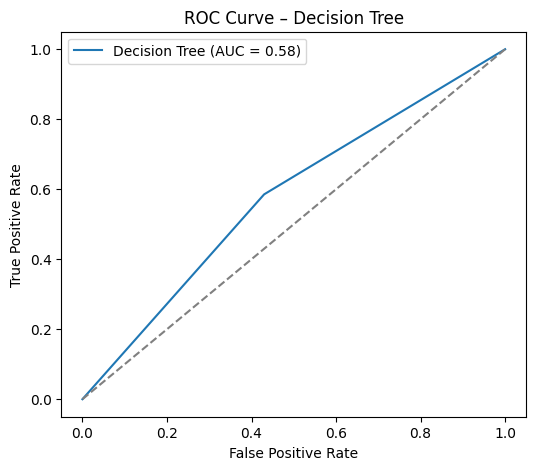


High-Risk Employees (Top 5):
      Job Level  Marital Status  Distance from Home  Employee ID  \
7702          0               1                 7.0          482   
1517          2               2                 1.0        59928   
3226          2               2                48.0        52998   
7266          1               1                71.0        51062   
7668          1               1                 4.0        68703   

      Monthly Income  Company Tenure  Age  Years at Company  \
7702          7394.0            49.0   28                 1   
1517          8778.0            87.0   30                 8   
3226          7181.0            98.0   58                31   
7266          4600.0            87.0   38                12   
7668          7640.0            21.0   51                 9   

      Attrition_Probability Risk_Level  
7702                    1.0  High Risk  
1517                    1.0  High Risk  
3226                    1.0  High Risk  
7266              

In [12]:
# ===============================
# Decision Tree Training & Evaluation
# ===============================

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sel, y_train)

# 2️⃣ Predictions
y_pred_dt = dt.predict(X_test_sel)
y_prob_dt = dt.predict_proba(X_test_sel)[:, 1]

# 3️⃣ Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# 5️⃣ Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 6️⃣ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

# 7️⃣ ROC–AUC Score
auc = roc_auc_score(y_test, y_prob_dt)
print("ROC-AUC Score:", auc)

# 8️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.show()

# ===============================
# 🔹 High-Risk Employee Detection
# ===============================

risk_df = X_test_sel.copy()
risk_df["Attrition_Probability"] = y_prob_dt
risk_df["Risk_Level"] = risk_df["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
print(risk_df.sort_values("Attrition_Probability", ascending=False).head())

**SHAP ANALYSIS (Decision Tree)**

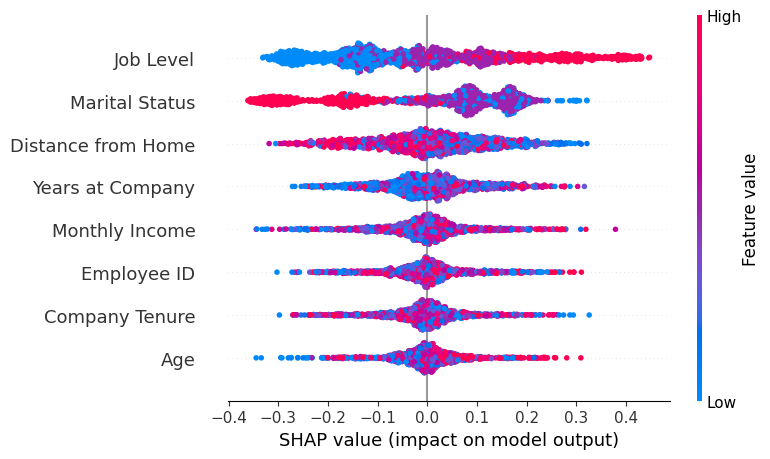

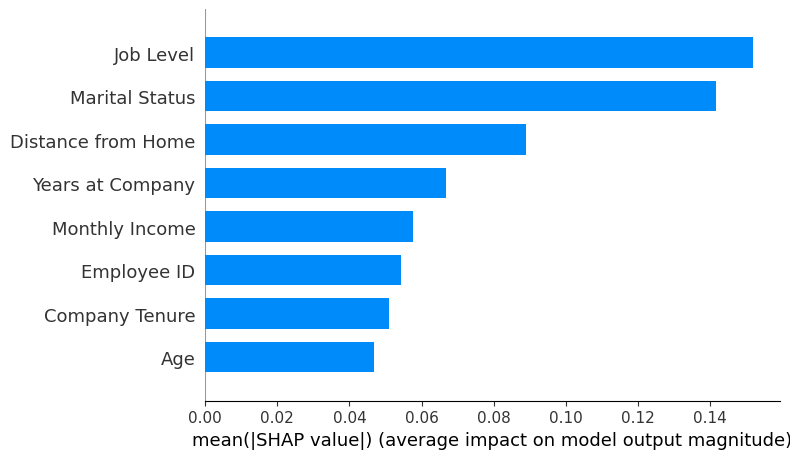

In [13]:
# ===============================
# SHAP Analysis for Decision Tree (FINAL & ERROR-FREE)
# Compatible with SHAP v0.20+
# ===============================

import shap
import numpy as np

# The 'dt' model is now defined from the previous cell
model = dt

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sel)

# ===============================
# Handle SHAP output safely
# ===============================

if isinstance(shap_values, list):
    # Binary classification (class 1 = Attrition)
    shap_vals = shap_values[1]
    base_value = explainer.expected_value[1]
else:
    # New SHAP versions (3D array)
    shap_vals = shap_values[:, :, 1]
    base_value = explainer.expected_value[1] # Select expected value for class 1

# ===============================
# 1️⃣ Global Feature Importance
# ===============================

shap.summary_plot(shap_vals, X_test_sel)

# ===============================
# 2️⃣ Feature Importance (Bar Plot)
# ===============================

shap.summary_plot(shap_vals, X_test_sel, plot_type="bar")

# ===============================
# 3️⃣ Individual Employee Explanation
# ===============================

employee_index = 4  # change index if required

shap.plots.force(
    base_value,
    shap_vals[employee_index],
    X_test_sel.iloc[employee_index]
)

**Random forest**

Random Forest Accuracy: 0.645935960591133

Confusion Matrix:
 [[466 297]
 [278 583]]


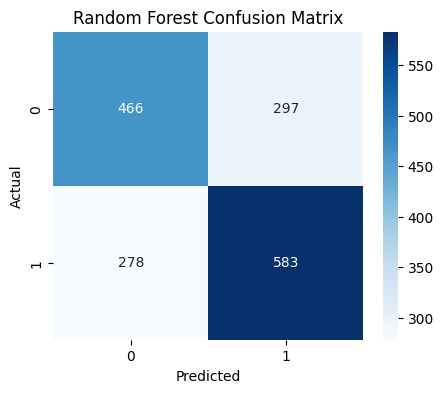


Precision: 0.6625
Recall: 0.6771196283391405
F1 Score: 0.6697300402067777

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       763
           1       0.66      0.68      0.67       861

    accuracy                           0.65      1624
   macro avg       0.64      0.64      0.64      1624
weighted avg       0.65      0.65      0.65      1624

ROC-AUC Score: 0.7008477143374692


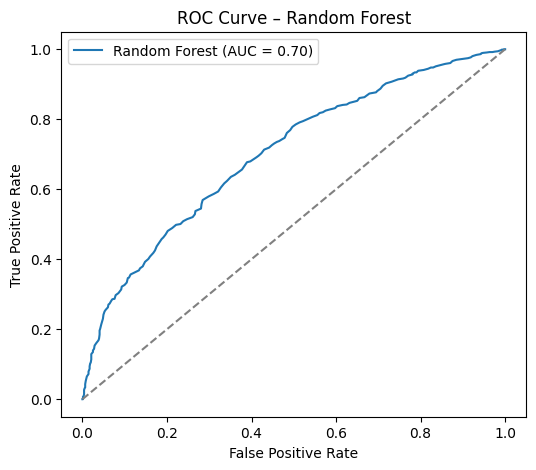


High-Risk Employees (Top 5):


,Job Level,Marital Status,Distance from Home,Employee ID,Monthly Income,Company Tenure,Age,Years at Company,Attrition_Probability,Risk_Level
6506,2,1,45.0,23599,6609.0,66.0,41,33,0.990,High Risk
5933,2,1,42.0,70414,7280.0,74.0,48,21,0.975,High Risk
6946,2,1,50.0,22849,6797.0,80.0,41,26,0.975,High Risk
7794,2,1,15.0,34460,10331.0,59.0,32,20,0.975,High Risk
6853,2,1,88.0,13586,9132.0,76.0,45,31,0.970,High Risk


In [14]:
# ===============================
# Random Forest Training, Risk Detection & Evaluation
# ===============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train_sel, y_train)

# 2️⃣ Predictions
y_pred_rf = rf.predict(X_test_sel)
y_prob_rf = rf.predict_proba(X_test_sel)[:, 1]

# 3️⃣ Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# 5️⃣ Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 6️⃣ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# 7️⃣ ROC–AUC Score
auc = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", auc)

# 8️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()

# ===============================
# 🔹 High-Risk Employee Detection
# ===============================

risk_df = X_test_sel.copy()
risk_df["Attrition_Probability"] = y_prob_rf
risk_df["Risk_Level"] = risk_df["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
risk_df.sort_values("Attrition_Probability", ascending=False).head()


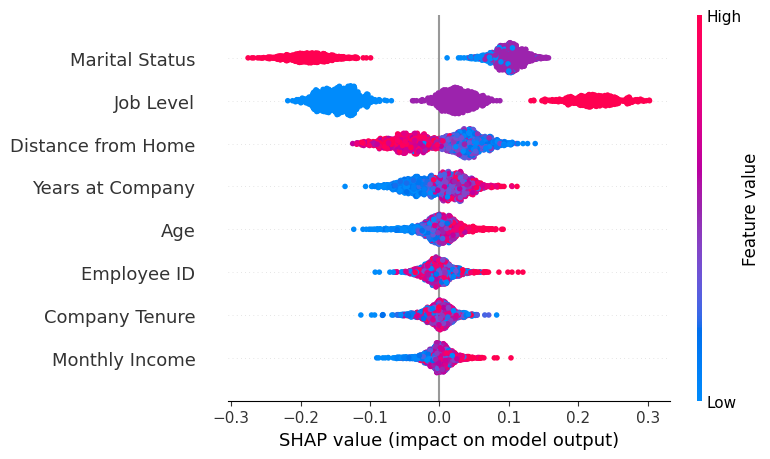

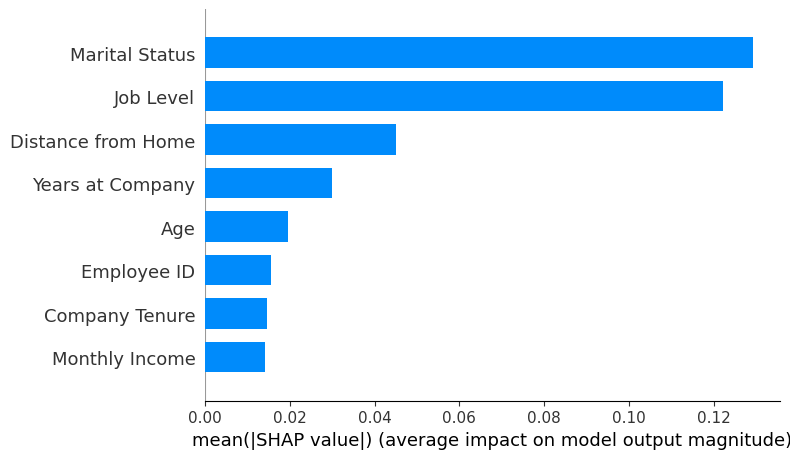

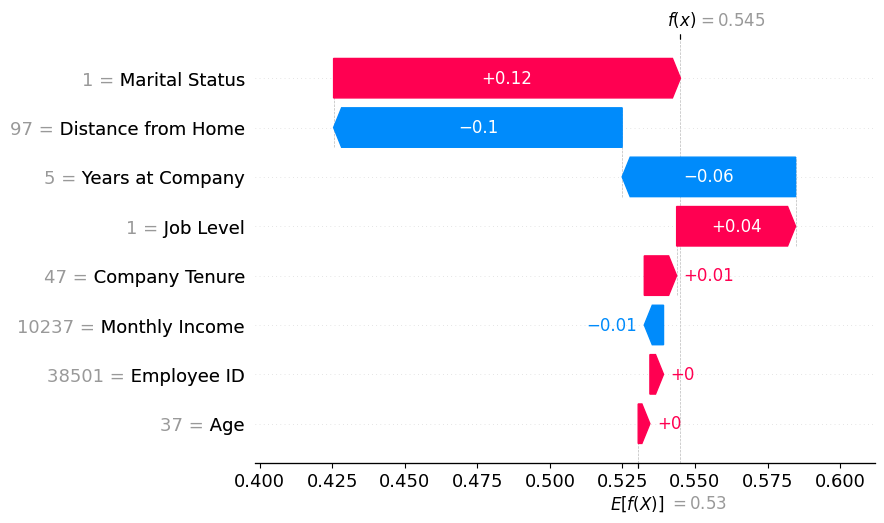

In [15]:
# ===============================
# SHAP Analysis for RANDOM FOREST (v0.20+ SAFE)
# ===============================

import shap

# Use trained Random Forest model
model = rf

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# IMPORTANT: new SHAP API
shap_values = explainer(X_test_sel)

# ===============================
# 1️⃣ Global Feature Importance
# ===============================

shap.summary_plot(
    shap_values.values[:, :, 1], # Select SHAP values for class 1 for all samples
    X_test_sel
)

# ===============================
# 2️⃣ Feature Importance (Bar Plot)
# ===============================

shap.summary_plot(
    shap_values.values[:, :, 1], # Select SHAP values for class 1 for all samples
    X_test_sel,
    plot_type="bar"
)

# ===============================
# 3️⃣ Individual Employee Explanation
# ===============================

employee_index = 4  # change if required

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values.values[employee_index, :, 1], # Select SHAP values for employee_index, all features, class 1
        base_values=explainer.expected_value[1],
        data=X_test_sel.iloc[employee_index],
        feature_names=X_test_sel.columns
    )
)

**ANN**

ANN Accuracy: 0.6262315270935961
Precision: 0.6449771689497716
Recall: 0.6562137049941928
F1 Score: 0.6505469199769718
ROC-AUC Score: 0.6719761075161772

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       763
           1       0.64      0.66      0.65       861

    accuracy                           0.63      1624
   macro avg       0.62      0.62      0.62      1624
weighted avg       0.63      0.63      0.63      1624



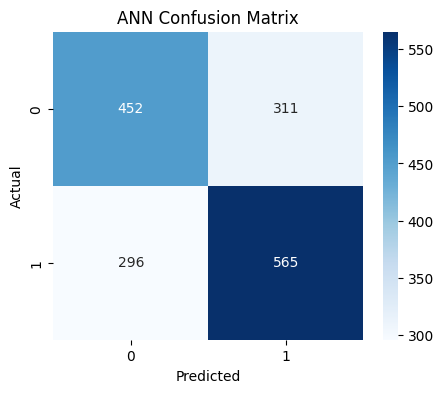

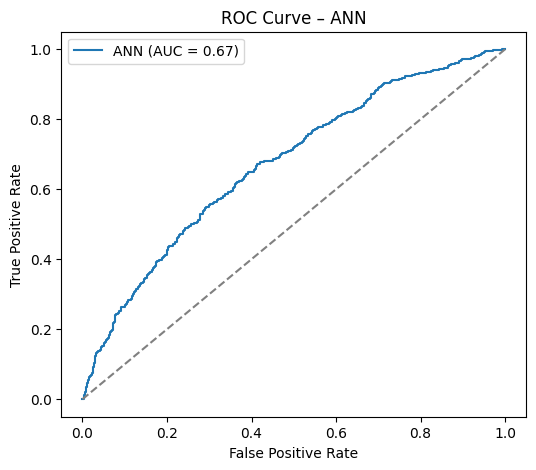


High-Risk Employees (Top 5):


,Job Level,Marital Status,Distance from Home,Employee ID,Monthly Income,Company Tenure,Age,Years at Company,Attrition_Probability,Risk_Level
6370,2,0,28.0,9804,8259.0,115.0,50,40,0.999672,High Risk
304,2,1,32.0,33959,10583.0,102.0,56,48,0.998457,High Risk
5163,2,1,69.0,60459,5918.0,71.0,50,42,0.996819,High Risk
3171,2,1,66.0,35473,6388.0,115.0,58,47,0.996471,High Risk
6734,2,1,10.0,43893,9476.0,27.0,36,26,0.996399,High Risk


In [16]:
# ===============================
# ANN Training, Risk Detection & Evaluation
# ===============================

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# 1️⃣ Feature Scaling (MANDATORY for ANN)
# ===============================

scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train_sel)
X_test_ann = scaler.transform(X_test_sel)

# ===============================
# 2️⃣ Train ANN Model
# ===============================

ann = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

ann.fit(X_train_ann, y_train)

# ===============================
# 3️⃣ Predictions
# ===============================

y_pred_ann = ann.predict(X_test_ann)
y_prob_ann = ann.predict_proba(X_test_ann)[:, 1]

# ===============================
# 4️⃣ Evaluation Metrics
# ===============================

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1 Score:", f1_score(y_test, y_pred_ann))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_ann))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ann))

# ===============================
# 5️⃣ Confusion Matrix
# ===============================

cm = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("ANN Confusion Matrix")
plt.show()

# ===============================
# 6️⃣ ROC Curve
# ===============================

fpr, tpr, _ = roc_curve(y_test, y_prob_ann)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ANN (AUC = {roc_auc_score(y_test, y_prob_ann):.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – ANN")
plt.legend()
plt.show()

# ===============================
# 7️⃣ High-Risk Employee Detection
# ===============================

risk_df_ann = X_test_sel.copy()
risk_df_ann["Attrition_Probability"] = y_prob_ann
risk_df_ann["Risk_Level"] = risk_df_ann["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
risk_df_ann.sort_values("Attrition_Probability", ascending=False).head()


  0%|          | 0/50 [00:00<?, ?it/s]

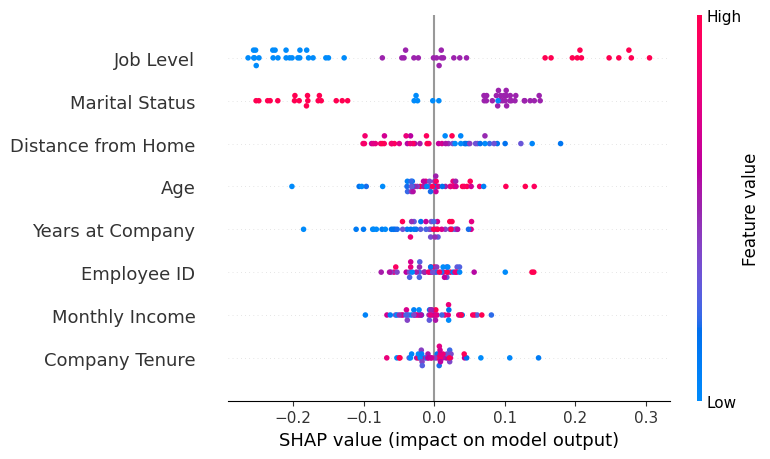

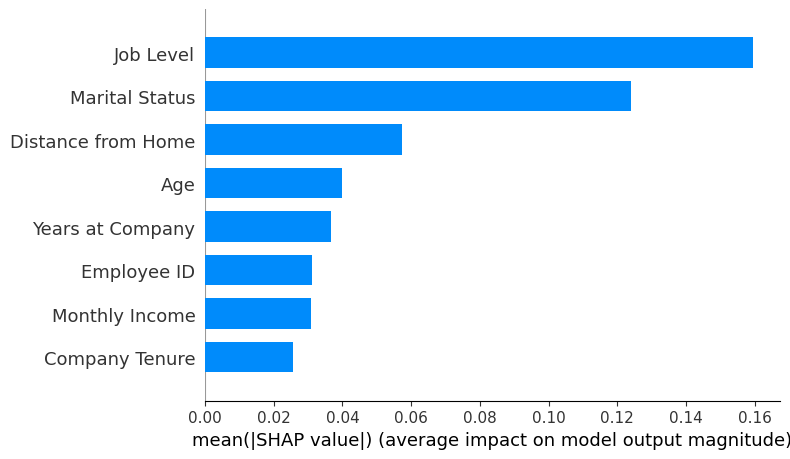

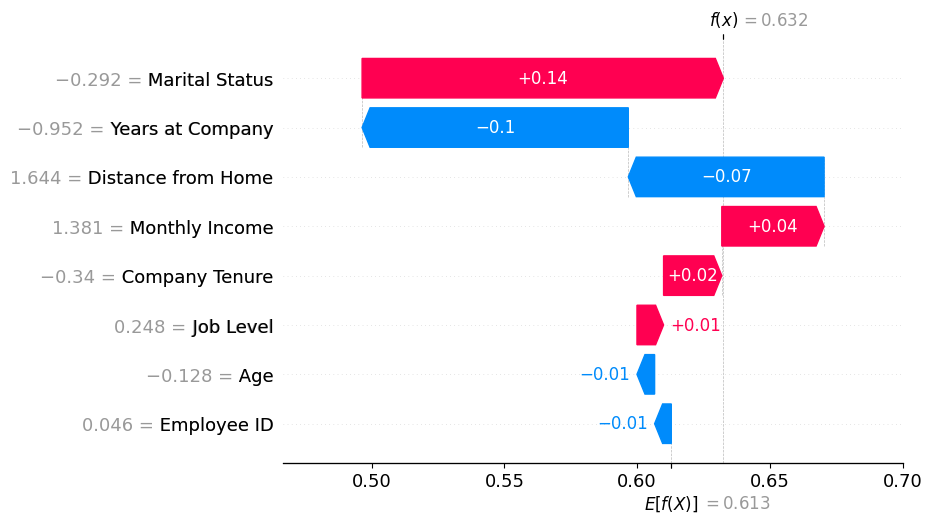

In [17]:
# ===============================
# ANN + SHAP (KernelExplainer) – FINAL FIX
# ===============================

import shap
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Background data (scaled)
# -------------------------------
background = X_train_ann[
    np.random.choice(X_train_ann.shape[0], 50, replace=False)
]

# -------------------------------
# 2️⃣ KernelExplainer
# -------------------------------
explainer = shap.KernelExplainer(
    ann.predict_proba,
    background
)

# -------------------------------
# 3️⃣ Explain a small test subset (scaled)
# -------------------------------
X_test_sample_ann = X_test_ann[:50]

shap_values = explainer.shap_values(X_test_sample_ann)

# -------------------------------
# 4️⃣ Convert scaled data to DataFrame (IMPORTANT)
# -------------------------------
X_test_sample_df = pd.DataFrame(
    X_test_sample_ann,
    columns=X_test_sel.columns
)

# -------------------------------
# 5️⃣ Global Feature Importance
# -------------------------------
shap.summary_plot(
    shap_values[:, :, 1], # Corrected: Select SHAP values for class 1 for all samples
    X_test_sample_df
)

# -------------------------------
# 6️⃣ Feature Importance (Bar Plot)
# -------------------------------
shap.summary_plot(
    shap_values[:, :, 1], # Corrected: Select SHAP values for class 1 for all samples
    X_test_sample_df,
    plot_type="bar"
)

# -------------------------------
# 7️⃣ Individual Employee Explanation
# -------------------------------
employee_index = 4

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[employee_index, :, 1], # Corrected: Select SHAP values for employee_index, all features, class 1
        base_values=explainer.expected_value[1],
        data=X_test_sample_df.iloc[employee_index],
        feature_names=X_test_sample_df.columns
    )
)

**XG-Boost**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:10:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6299261083743842

Confusion Matrix:
 [[455 308]
 [293 568]]


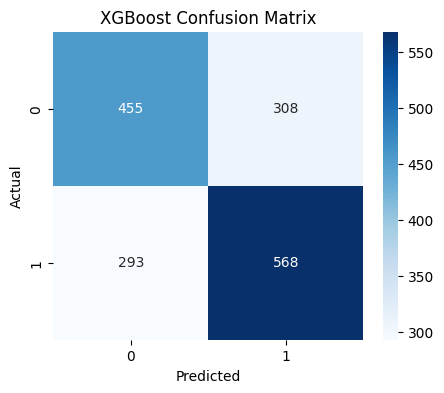


Precision: 0.6484018264840182
Recall: 0.6596980255516841
F1 Score: 0.6540011514104779

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       763
           1       0.65      0.66      0.65       861

    accuracy                           0.63      1624
   macro avg       0.63      0.63      0.63      1624
weighted avg       0.63      0.63      0.63      1624

ROC-AUC Score: 0.682473213048925


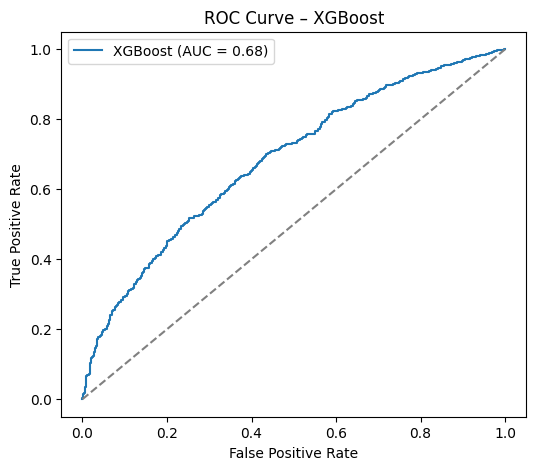


High-Risk Employees (Top 5):
      Job Level  Marital Status  Distance from Home  Employee ID  \
2821          2               1                43.0        19779   
620           2               1                51.0         5548   
3171          2               1                66.0        35473   
7067          2               1                98.0        21777   
7331          2               1                98.0        30701   

      Monthly Income  Company Tenure  Age  Years at Company  \
2821          4956.0            85.0   32                20   
620           4966.0            94.0   58                45   
3171          6388.0           115.0   58                47   
7067          6055.0            89.0   52                33   
7331          3423.0            83.0   40                18   

      Attrition_Probability Risk_Level  
2821               0.998162  High Risk  
620                0.996062  High Risk  
3171               0.995473  High Risk  
7067              

In [18]:
# ===============================
# XGBoost Training, Risk Detection & Evaluation
# ===============================

import xgboost as xgb
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Train XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train_sel, y_train)

# 2️⃣ Predictions
y_pred_xgb = xgb_model.predict(X_test_sel)
y_prob_xgb = xgb_model.predict_proba(X_test_sel)[:, 1]

# 3️⃣ Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy)

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# 5️⃣ Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 6️⃣ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# 7️⃣ ROC–AUC Score
auc = roc_auc_score(y_test, y_prob_xgb)
print("ROC-AUC Score:", auc)

# 8️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.show()

# ===============================
# 🔹 High-Risk Employee Detection
# ===============================

risk_df_xgb = X_test_sel.copy()
risk_df_xgb["Attrition_Probability"] = y_prob_xgb
risk_df_xgb["Risk_Level"] = risk_df_xgb["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
print(risk_df_xgb.sort_values("Attrition_Probability", ascending=False).head())

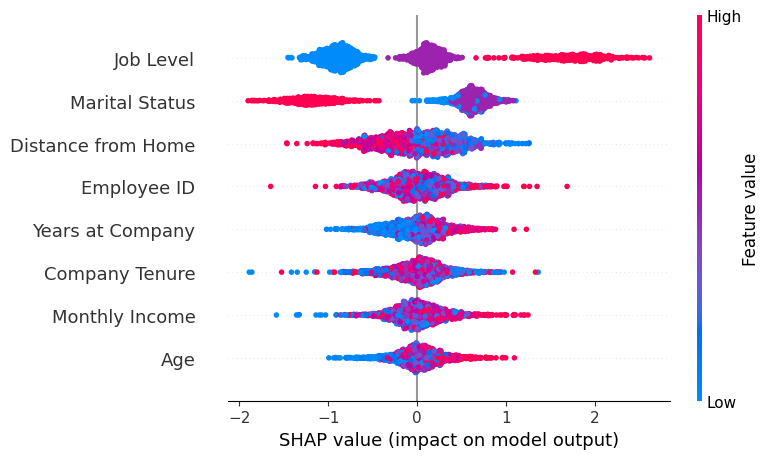

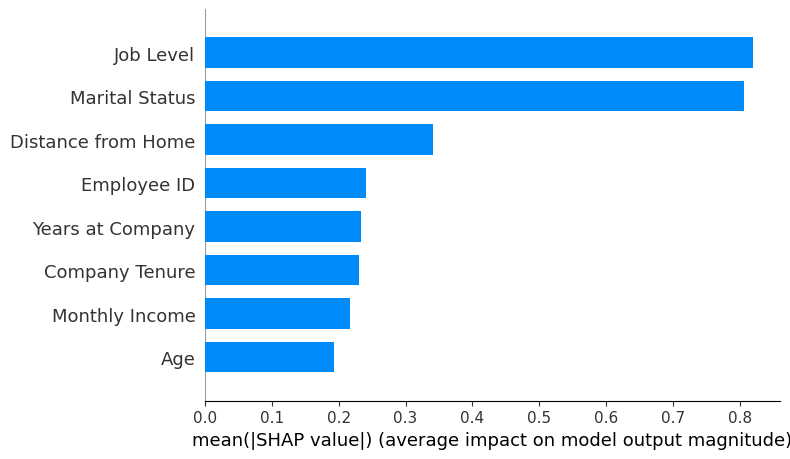

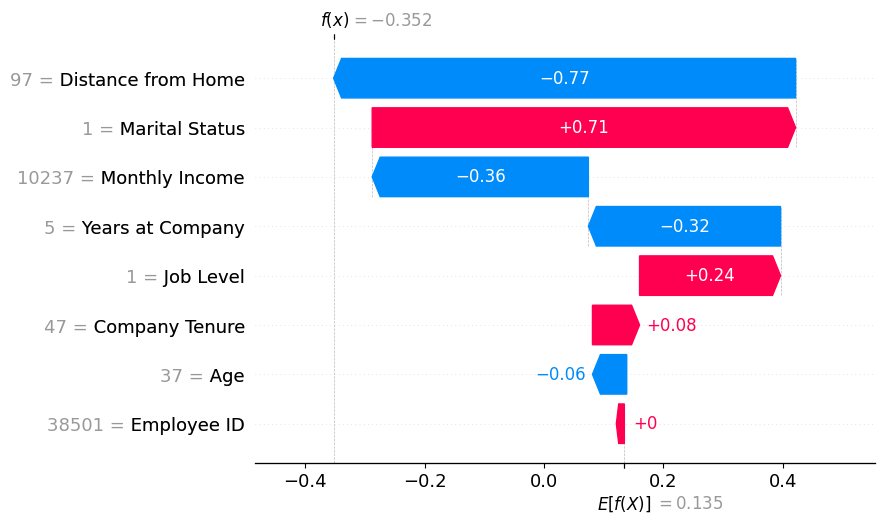

In [19]:
# ===============================
# SHAP Analysis for XGBoost (v0.20+ SAFE)
# ===============================

import shap

# Use trained XGBoost model
model = xgb_model

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# IMPORTANT: new SHAP API
shap_values = explainer(X_test_sel)

# ===============================
# 1️⃣ Global Feature Importance
# ===============================

shap.summary_plot(
    shap_values.values,
    X_test_sel
)

# ===============================
# 2️⃣ Feature Importance (Bar Plot)
# ===============================

shap.summary_plot(
    shap_values.values,
    X_test_sel,
    plot_type="bar"
)

# ===============================
# 3️⃣ Individual Employee Explanation
# ===============================

employee_index = 4  # change if required

shap.plots.waterfall(
    shap_values[employee_index]
)

# **Naive Bayes**

Naive Bayes Accuracy: 0.6342364532019704

Confusion Matrix:
 [[447 316]
 [278 583]]


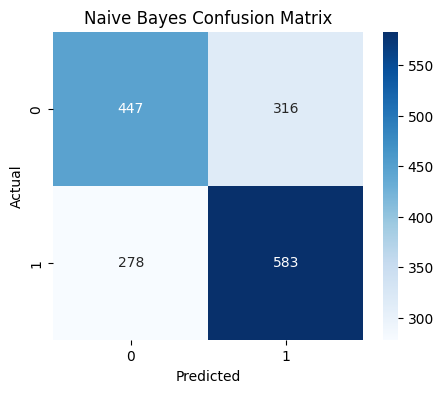


Precision: 0.6484983314794216
Recall: 0.6771196283391405
F1 Score: 0.6625

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       763
           1       0.65      0.68      0.66       861

    accuracy                           0.63      1624
   macro avg       0.63      0.63      0.63      1624
weighted avg       0.63      0.63      0.63      1624

ROC-AUC Score: 0.6887568632286211


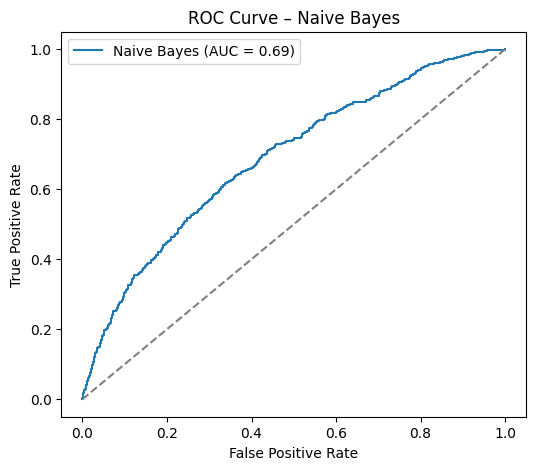


High-Risk Employees (Top 5):
      Job Level  Marital Status  Distance from Home  Employee ID  \
2866          2               1                10.0        12554   
304           2               1                32.0        33959   
6370          2               0                28.0         9804   
7729          2               0                24.0         7520   
896           2               0                 8.0         3803   

      Monthly Income  Company Tenure  Age  Years at Company  \
2866          5339.0           122.0   55                47   
304          10583.0           102.0   56                48   
6370          8259.0           115.0   50                40   
7729          7365.0            86.0   59                34   
896           8863.0            40.0   54                33   

      Attrition_Probability Risk_Level  
2866               0.891867  High Risk  
304                0.890926  High Risk  
6370               0.887720  High Risk  
7729              

In [20]:
# ===============================
# Naive Bayes Training, Risk Detection & Evaluation
# ===============================

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Train Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_sel, y_train)

# 2️⃣ Predictions
y_pred_gnb = gnb.predict(X_test_sel)
y_prob_gnb = gnb.predict_proba(X_test_sel)[:, 1]

# 3️⃣ Accuracy
accuracy = accuracy_score(y_test, y_pred_gnb)
print("Naive Bayes Accuracy:", accuracy)

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# 5️⃣ Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 6️⃣ Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gnb))

# 7️⃣ ROC–AUC Score
auc = roc_auc_score(y_test, y_prob_gnb)
print("ROC-AUC Score:", auc)

# 8️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gnb)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Naive Bayes")
plt.legend()
plt.show()

# ===============================
# 🔹 High-Risk Employee Detection
# ===============================

risk_df_gnb = X_test_sel.copy()
risk_df_gnb["Attrition_Probability"] = y_prob_gnb
risk_df_gnb["Risk_Level"] = risk_df_gnb["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
print(risk_df_gnb.sort_values("Attrition_Probability", ascending=False).head())

**SHAP ANALYSIS (Naive Bayes)**

  0%|          | 0/50 [00:00<?, ?it/s]

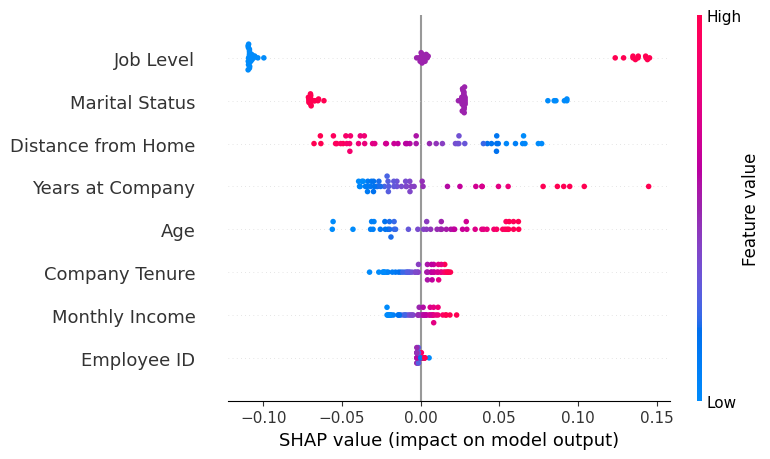

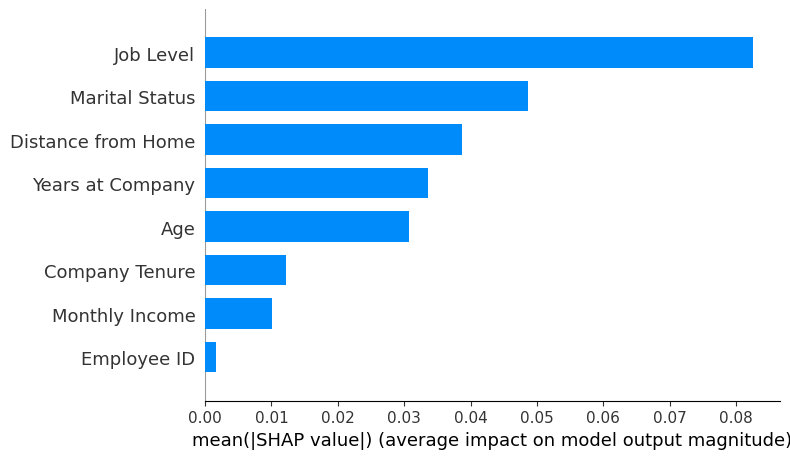

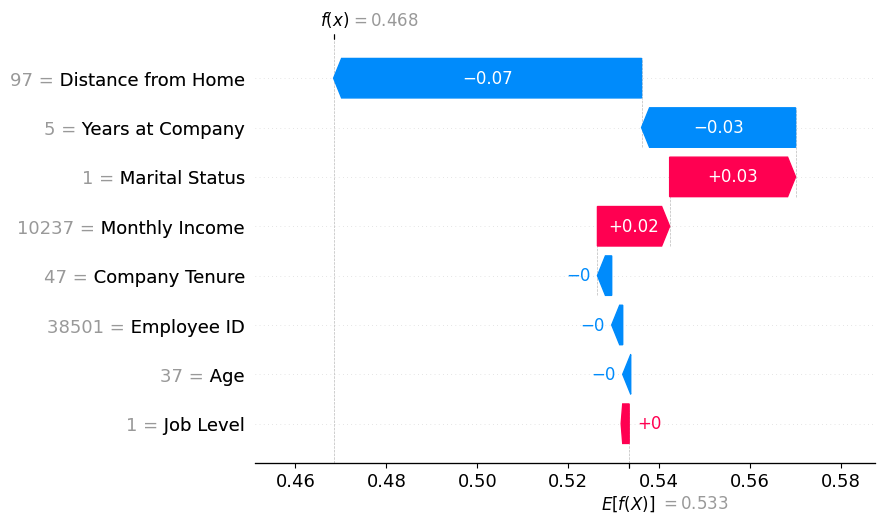

In [22]:
# ===============================
# Naive Bayes + SHAP (KernelExplainer)
# ===============================

import shap
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Background data
# -------------------------------
# Using X_train_sel as background data. Randomly sample 50 instances for efficiency.
background = X_train_sel.iloc[np.random.choice(X_train_sel.shape[0], 50, replace=False)]

# -------------------------------
# 2️⃣ KernelExplainer
# -------------------------------
# Since GaussianNB has a predict_proba method, we can explain its output.
explainer = shap.KernelExplainer(
    gnb.predict_proba,
    background
)

# -------------------------------
# 3️⃣ Explain a small test subset
# -------------------------------
# Use a small subset of X_test_sel for explanation for computational efficiency.
X_test_sample_gnb = X_test_sel.iloc[:50]

shap_values = explainer.shap_values(X_test_sample_gnb)

# -------------------------------
# 4️⃣ Global Feature Importance
# -------------------------------
# For binary classification, we focus on the SHAP values for the positive class (index 1)
shap.summary_plot(
    shap_values[:, :, 1], # Corrected: Select SHAP values for class 1 for all samples
    X_test_sample_gnb
)

# -------------------------------
# 5️⃣ Feature Importance (Bar Plot)
# -------------------------------
shap.summary_plot(
    shap_values[:, :, 1], # Corrected: Select SHAP values for class 1 for all samples
    X_test_sample_gnb,
    plot_type="bar"
)

# -------------------------------
# 6️⃣ Individual Employee Explanation
# -------------------------------
employee_index = 4  # change index if required

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[employee_index, :, 1], # Corrected: SHAP values for class 1 for a specific employee
        base_values=explainer.expected_value[1],
        data=X_test_sample_gnb.iloc[employee_index],
        feature_names=X_test_sample_gnb.columns
    )
)

# Loggistic Regression

**Lasso Regression**

Lasso Logistic Regression Accuracy: 0.6477832512315271
Precision: 0.6714116251482799
Recall: 0.6573751451800233
F1 Score: 0.6643192488262911
ROC-AUC Score: 0.710302111446503

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       763
           1       0.67      0.66      0.66       861

    accuracy                           0.65      1624
   macro avg       0.65      0.65      0.65      1624
weighted avg       0.65      0.65      0.65      1624



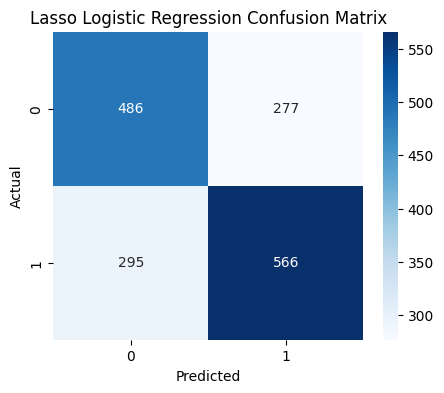

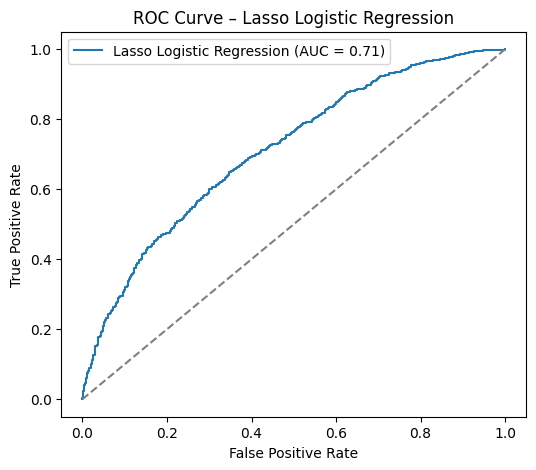


High-Risk Employees (Top 5):
      Job Level  Marital Status  Distance from Home  Employee ID  \
896           2               0                 8.0         3803   
7729          2               0                24.0         7520   
6593          2               0                24.0        43497   
6370          2               0                28.0         9804   
318           2               0                 8.0        15607   

      Monthly Income  Company Tenure  Age  Years at Company  \
896           8863.0            40.0   54                33   
7729          7365.0            86.0   59                34   
6593          8497.0            58.0   53                36   
6370          8259.0           115.0   50                40   
318           8778.0            50.0   54                14   

      Attrition_Probability Risk_Level  
896                0.950075  High Risk  
7729               0.945446  High Risk  
6593               0.945245  High Risk  
6370              

In [23]:
# ===============================
# Logistic Regression (Lasso L1 Regularization)
# Training, Risk Detection & Evaluation
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# 1️⃣ Feature Scaling (Important for L1 regularization)
# ===============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

# ===============================
# 2️⃣ Train Logistic Regression with L1 Regularization (Lasso)
# ===============================

# C is the inverse of regularization strength; smaller values specify stronger regularization.
# solver='liblinear' supports L1 regularization for binary classification.
lasso_lr = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.1, # You can tune this parameter
    random_state=42
)
lasso_lr.fit(X_train_scaled, y_train)

# ===============================
# 3️⃣ Predictions
# ===============================

y_pred_lasso = lasso_lr.predict(X_test_scaled)
y_prob_lasso = lasso_lr.predict_proba(X_test_scaled)[:, 1]

# ===============================
# 4️⃣ Evaluation Metrics
# ===============================

print("Lasso Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Precision:", precision_score(y_test, y_pred_lasso))
print("Recall:", recall_score(y_test, y_pred_lasso))
print("F1 Score:", f1_score(y_test, y_pred_lasso))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lasso))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lasso))

# ===============================
# 5️⃣ Confusion Matrix
# ===============================

cm = confusion_matrix(y_test, y_pred_lasso)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Lasso Logistic Regression Confusion Matrix")
plt.show()

# ===============================
# 6️⃣ ROC Curve
# ===============================

fpr, tpr, _ = roc_curve(y_test, y_prob_lasso)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Lasso Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lasso):.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Lasso Logistic Regression")
plt.legend()
plt.show()

# ===============================
# 7️⃣ High-Risk Employee Detection
# ===============================

risk_df_lasso = X_test_sel.copy()
risk_df_lasso["Attrition_Probability"] = y_prob_lasso
risk_df_lasso["Risk_Level"] = risk_df_lasso["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
print(risk_df_lasso.sort_values("Attrition_Probability", ascending=False).head())

**SHAP ANALYSIS (Lasso Logistic Regression)**

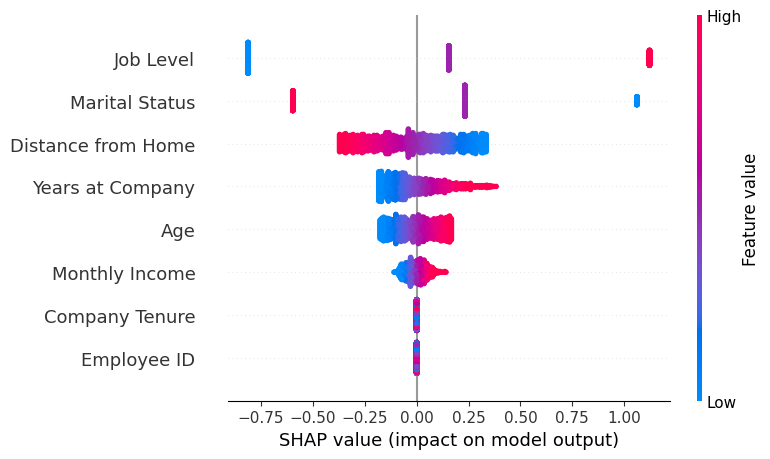

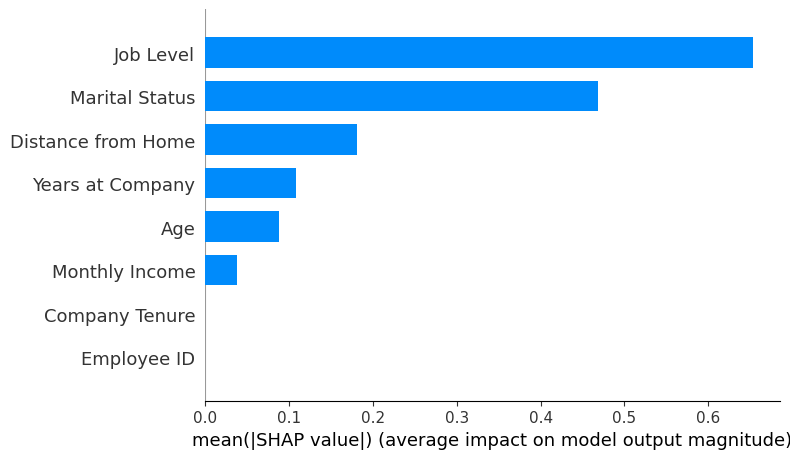

In [25]:
# ===============================
# SHAP Analysis for Lasso Logistic Regression (LinearExplainer)
# ===============================

import shap
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Create SHAP explainer for linear models
# -------------------------------
# LinearExplainer takes the model and the background data (usually X_train_scaled or a subset)
# It uses the coefficients and intercept of the linear model.
explainer = shap.LinearExplainer(
    lasso_lr,
    shap.maskers.Independent(X_train_scaled), # Corrected: Use shap.maskers.Independent
    feature_names=X_train_sel.columns # Added feature names for better plots
)

# -------------------------------
# 2️⃣ Compute SHAP values for the test set
# -------------------------------
# For LinearExplainer, shap_values is typically a single array for the positive class
shap_values = explainer.shap_values(X_test_scaled)

# -------------------------------
# 3️⃣ Convert scaled data back to DataFrame for plotting with feature names
# -------------------------------
X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X_test_sel.columns
)

# ===============================
# 4️⃣ Global Feature Importance (Summary Plot)
# ===============================
# For LinearExplainer with a binary model, shap_values is already for the positive class.
shap.summary_plot(
    shap_values, # Corrected: Pass shap_values directly (it's already a matrix for class 1)
    X_test_scaled_df
)

# ===============================
# 5️⃣ Feature Importance (Bar Plot)
# ===============================
shap.summary_plot(
    shap_values, # Corrected: Pass shap_values directly
    X_test_scaled_df,
    plot_type="bar"
)

# ===============================
# 6️⃣ Individual Employee Explanation (Force Plot)
# ===============================

employee_index = 4  # change index if required

shap.plots.force(
    explainer.expected_value, # Corrected: Use explainer.expected_value directly (it's a scalar)
    shap_values[employee_index], # Corrected: Access SHAP values for the employee directly
    X_test_scaled_df.iloc[employee_index]
)

**Ridge Regression**

Ridge Logistic Regression Accuracy: 0.6477832512315271
Precision: 0.6714116251482799
Recall: 0.6573751451800233
F1 Score: 0.6643192488262911
ROC-AUC Score: 0.7098637172479195

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       763
           1       0.67      0.66      0.66       861

    accuracy                           0.65      1624
   macro avg       0.65      0.65      0.65      1624
weighted avg       0.65      0.65      0.65      1624



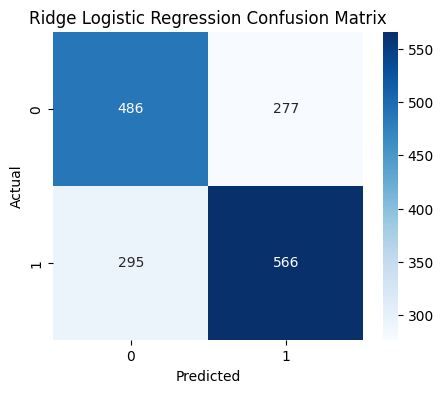

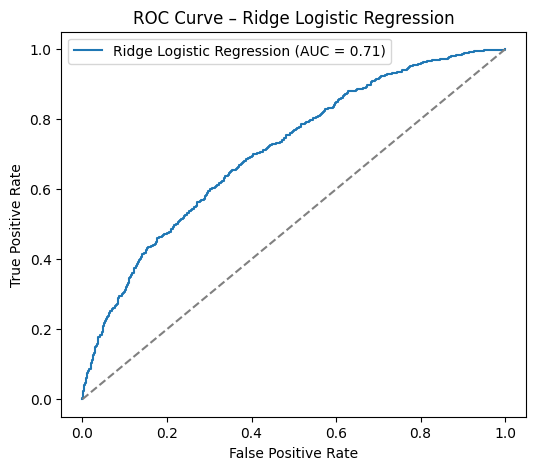


High-Risk Employees (Top 5):
      Job Level  Marital Status  Distance from Home  Employee ID  \
896           2               0                 8.0         3803   
6593          2               0                24.0        43497   
7729          2               0                24.0         7520   
6370          2               0                28.0         9804   
318           2               0                 8.0        15607   

      Monthly Income  Company Tenure  Age  Years at Company  \
896           8863.0            40.0   54                33   
6593          8497.0            58.0   53                36   
7729          7365.0            86.0   59                34   
6370          8259.0           115.0   50                40   
318           8778.0            50.0   54                14   

      Attrition_Probability Risk_Level  
896                0.954115  High Risk  
6593               0.949008  High Risk  
7729               0.948906  High Risk  
6370              

In [26]:
# ===============================
# Logistic Regression (Ridge L2 Regularization)
# Training, Risk Detection & Evaluation
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# 1️⃣ Feature Scaling (Important for L2 regularization)
# ===============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

# ===============================
# 2️⃣ Train Logistic Regression with L2 Regularization (Ridge)
# ===============================

# C is the inverse of regularization strength; smaller values specify stronger regularization.
# solver='liblinear' supports L2 regularization for binary classification.
ridge_lr = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    C=1.0, # You can tune this parameter
    random_state=42
)
ridge_lr.fit(X_train_scaled, y_train)

# ===============================
# 3️⃣ Predictions
# ===============================

y_pred_ridge = ridge_lr.predict(X_test_scaled)
y_prob_ridge = ridge_lr.predict_proba(X_test_scaled)[:, 1]

# ===============================
# 4️⃣ Evaluation Metrics
# ===============================

print("Ridge Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Precision:", precision_score(y_test, y_pred_ridge))
print("Recall:", recall_score(y_test, y_pred_ridge))
print("F1 Score:", f1_score(y_test, y_pred_ridge))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_ridge))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ridge))

# ===============================
# 5️⃣ Confusion Matrix
# ===============================

cm = confusion_matrix(y_test, y_pred_ridge)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Ridge Logistic Regression Confusion Matrix")
plt.show()

# ===============================
# 6️⃣ ROC Curve
# ===============================

fpr, tpr, _ = roc_curve(y_test, y_prob_ridge)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Ridge Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_ridge):.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Ridge Logistic Regression")
plt.legend()
plt.show()

# ===============================
# 7️⃣ High-Risk Employee Detection
# ===============================

risk_df_ridge = X_test_sel.copy()
risk_df_ridge["Attrition_Probability"] = y_prob_ridge
risk_df_ridge["Risk_Level"] = risk_df_ridge["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
print(risk_df_ridge.sort_values("Attrition_Probability", ascending=False).head())

**SHAP ANALYSIS (Ridge Logistic Regression)**

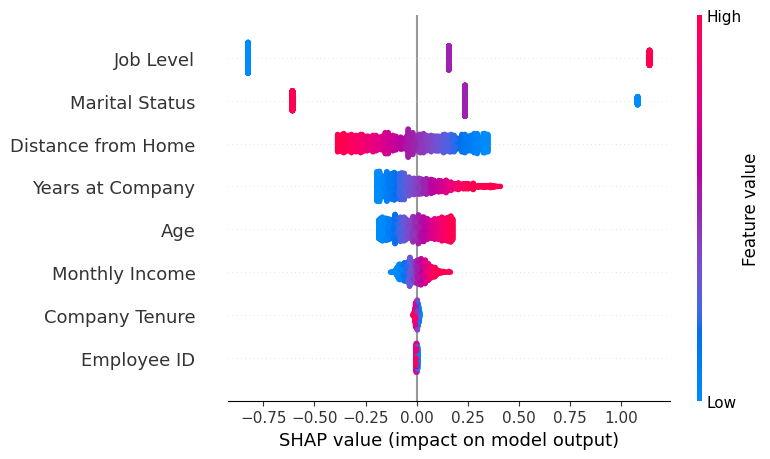

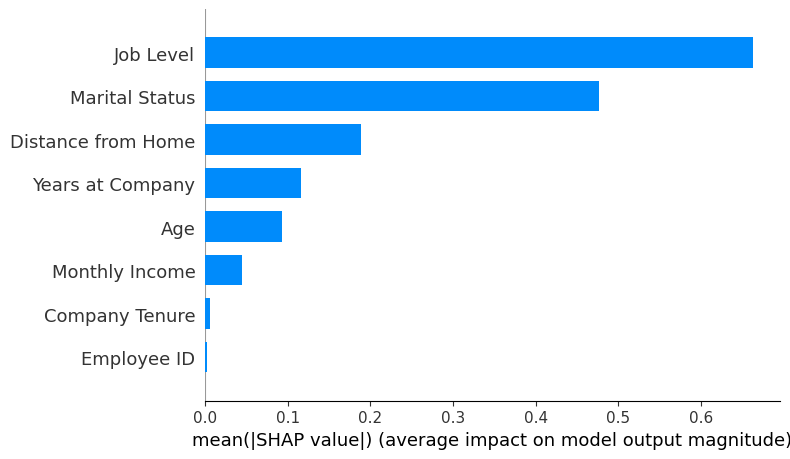

In [27]:
# ===============================
# SHAP Analysis for Ridge Logistic Regression (LinearExplainer)
# ===============================

import shap
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Create SHAP explainer for linear models
# -------------------------------
# LinearExplainer takes the model and the background data (usually X_train_scaled or a subset)
# It uses the coefficients and intercept of the linear model.
explainer = shap.LinearExplainer(
    ridge_lr,
    shap.maskers.Independent(X_train_scaled), # Use shap.maskers.Independent for background data
    feature_names=X_train_sel.columns # Added feature names for better plots
)

# -------------------------------
# 2️⃣ Compute SHAP values for the test set
# -------------------------------
# For LinearExplainer, shap_values is typically a single array for the positive class
shap_values = explainer.shap_values(X_test_scaled)

# -------------------------------
# 3️⃣ Convert scaled data back to DataFrame for plotting with feature names
# -------------------------------
X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X_test_sel.columns
)

# ===============================
# 4️⃣ Global Feature Importance (Summary Plot)
# ===============================
# For LinearExplainer with a binary model, shap_values is already for the positive class.
shap.summary_plot(
    shap_values,
    X_test_scaled_df
)

# ===============================
# 5️⃣ Feature Importance (Bar Plot)
# ===============================
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    plot_type="bar"
)

# ===============================
# 6️⃣ Individual Employee Explanation (Force Plot)
# ===============================

employee_index = 4  # change index if required

shap.plots.force(
    explainer.expected_value,
    shap_values[employee_index],
    X_test_scaled_df.iloc[employee_index]
)

**MIX**

Elastic Net Logistic Regression Accuracy: 0.6490147783251231
Precision: 0.672189349112426
Recall: 0.6596980255516841
F1 Score: 0.6658851113716295
ROC-AUC Score: 0.7100707367305839

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       763
           1       0.67      0.66      0.67       861

    accuracy                           0.65      1624
   macro avg       0.65      0.65      0.65      1624
weighted avg       0.65      0.65      0.65      1624



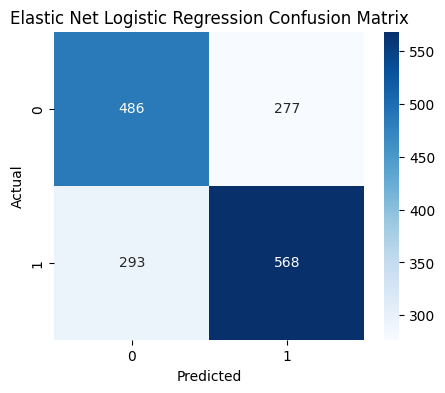

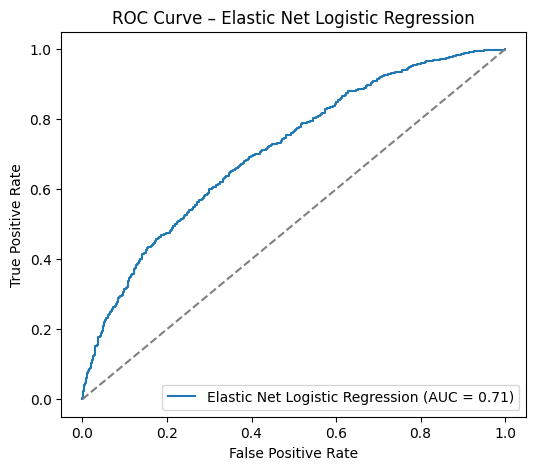


High-Risk Employees (Top 5):
      Job Level  Marital Status  Distance from Home  Employee ID  \
896           2               0                 8.0         3803   
7729          2               0                24.0         7520   
6593          2               0                24.0        43497   
6370          2               0                28.0         9804   
318           2               0                 8.0        15607   

      Monthly Income  Company Tenure  Age  Years at Company  \
896           8863.0            40.0   54                33   
7729          7365.0            86.0   59                34   
6593          8497.0            58.0   53                36   
6370          8259.0           115.0   50                40   
318           8778.0            50.0   54                14   

      Attrition_Probability Risk_Level  
896                0.951493  High Risk  
7729               0.946833  High Risk  
6593               0.946692  High Risk  
6370              

In [29]:
# ===============================
# Logistic Regression (Elastic Net L1 + L2 Regularization)
# Training, Risk Detection & Evaluation
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# 1️⃣ Feature Scaling (Important for Regularization)
# ===============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

# ===============================
# 2️⃣ Train Logistic Regression with Elastic Net Regularization
# ===============================

# penalty='elasticnet' combines L1 and L2.
# solver='saga' is required for elasticnet penalty.
# l1_ratio: The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.
# l1_ratio = 0 is equivalent to L2 (Ridge), l1_ratio = 1 is equivalent to L1 (Lasso).
# C is the inverse of regularization strength; smaller values specify stronger regularization.
elastic_lr = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5, # Adjust this value (0 to 1) for the mix of L1 and L2
    C=0.1, # You can tune this parameter
    random_state=42,
    max_iter=1000 # Increase max_iter for convergence if needed
)
elastic_lr.fit(X_train_scaled, y_train)

# ===============================
# 3️⃣ Predictions
# ===============================

y_pred_elastic = elastic_lr.predict(X_test_scaled)
y_prob_elastic = elastic_lr.predict_proba(X_test_scaled)[:, 1]

# ===============================
# 4️⃣ Evaluation Metrics
# ===============================

print("Elastic Net Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_elastic))
print("Precision:", precision_score(y_test, y_pred_elastic))
print("Recall:", recall_score(y_test, y_pred_elastic))
print("F1 Score:", f1_score(y_test, y_pred_elastic))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_elastic))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_elastic))

# ===============================
# 5️⃣ Confusion Matrix
# ===============================

cm = confusion_matrix(y_test, y_pred_elastic)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Elastic Net Logistic Regression Confusion Matrix")
plt.show()

# ===============================
# 6️⃣ ROC Curve
# ===============================

fpr, tpr, _ = roc_curve(y_test, y_prob_elastic)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Elastic Net Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_elastic):.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Elastic Net Logistic Regression")
plt.legend()
plt.show()

# ===============================
# 7️⃣ High-Risk Employee Detection
# ===============================

risk_df_elastic = X_test_sel.copy()
risk_df_elastic["Attrition_Probability"] = y_prob_elastic
risk_df_elastic["Risk_Level"] = risk_df_elastic["Attrition_Probability"].apply(
    lambda x: "High Risk" if x >= 0.7 else "Low Risk"
)

print("\nHigh-Risk Employees (Top 5):")
print(risk_df_elastic.sort_values("Attrition_Probability", ascending=False).head())

**SHAP ANALYSIS (Elastic Net Logistic Regression)**

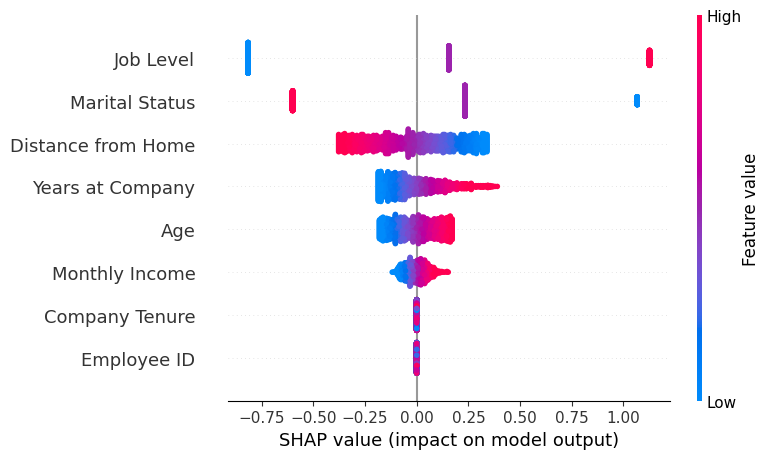

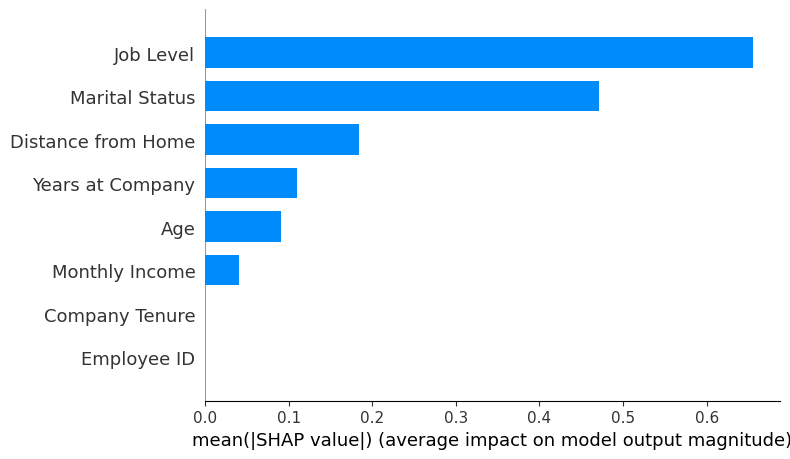

In [30]:
# ===============================
# SHAP Analysis for Elastic Net Logistic Regression (LinearExplainer)
# ===============================

import shap
import numpy as np
import pandas as pd

# -------------------------------
# 1️⃣ Create SHAP explainer for linear models
# -------------------------------
# LinearExplainer takes the model and the background data (usually X_train_scaled or a subset)
# It uses the coefficients and intercept of the linear model.
explainer = shap.LinearExplainer(
    elastic_lr,
    shap.maskers.Independent(X_train_scaled), # Use shap.maskers.Independent for background data
    feature_names=X_train_sel.columns # Added feature names for better plots
)

# -------------------------------
# 2️⃣ Compute SHAP values for the test set
# -------------------------------
# For LinearExplainer, shap_values is typically a single array for the positive class
shap_values = explainer.shap_values(X_test_scaled)

# -------------------------------
# 3️⃣ Convert scaled data back to DataFrame for plotting with feature names
# -------------------------------
X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X_test_sel.columns
)

# ===============================
# 4️⃣ Global Feature Importance (Summary Plot)
# ===============================
# For LinearExplainer with a binary model, shap_values is already for the positive class.
shap.summary_plot(
    shap_values,
    X_test_scaled_df
)

# ===============================
# 5️⃣ Feature Importance (Bar Plot)
# ===============================
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    plot_type="bar"
)

# ===============================
# 6️⃣ Individual Employee Explanation (Force Plot)
# ===============================

employee_index = 4  # change index if required

shap.plots.force(
    explainer.expected_value,
    shap_values[employee_index],
    X_test_scaled_df.iloc[employee_index]
)